In [1]:
## Importing packages

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

## Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

## Tree model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import shap

## Functions for methods
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

import math
import warnings
import numbers

/rds/general/user/sw5122/home/anaconda3/envs/test1/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Interpret the clustering with a decision tree(Clustinng data from R)

In [2]:
ukb_bio_urine_cluster_path = "/rds/general/project/hda-22-23/live/TDS/sw5122/ukb_ml_train_bio_urine_cluster.csv"
ukb_ml_train_bio_urine_cluster = pd.read_csv(ukb_bio_urine_cluster_path)
ukb_ml_train_bio_urine_cluster.shape

(22968, 30)

In [3]:
ukb_ml_train_x_bio_urine = ukb_ml_train_bio_urine_cluster.iloc[:,:-1]
clusterer_labels_tree  = ukb_ml_train_bio_urine_cluster.iloc[:,-1]
clusterer_labels_tree = clusterer_labels_tree .astype("str")

In [4]:
parameters = {'max_depth': range(5,25),'min_samples_leaf':[8,16,48,80,112,144,176,192], 'criterion':['gini', 'entropy']}
Cluster_tree = GridSearchCV(DecisionTreeClassifier(random_state = 8), parameters, n_jobs=8)
Cluster_tree.fit(X=ukb_ml_train_x_bio_urine , y=clusterer_labels_tree)
print(Cluster_tree.best_params_)
Cluster_tree_model = Cluster_tree.best_estimator_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 8}


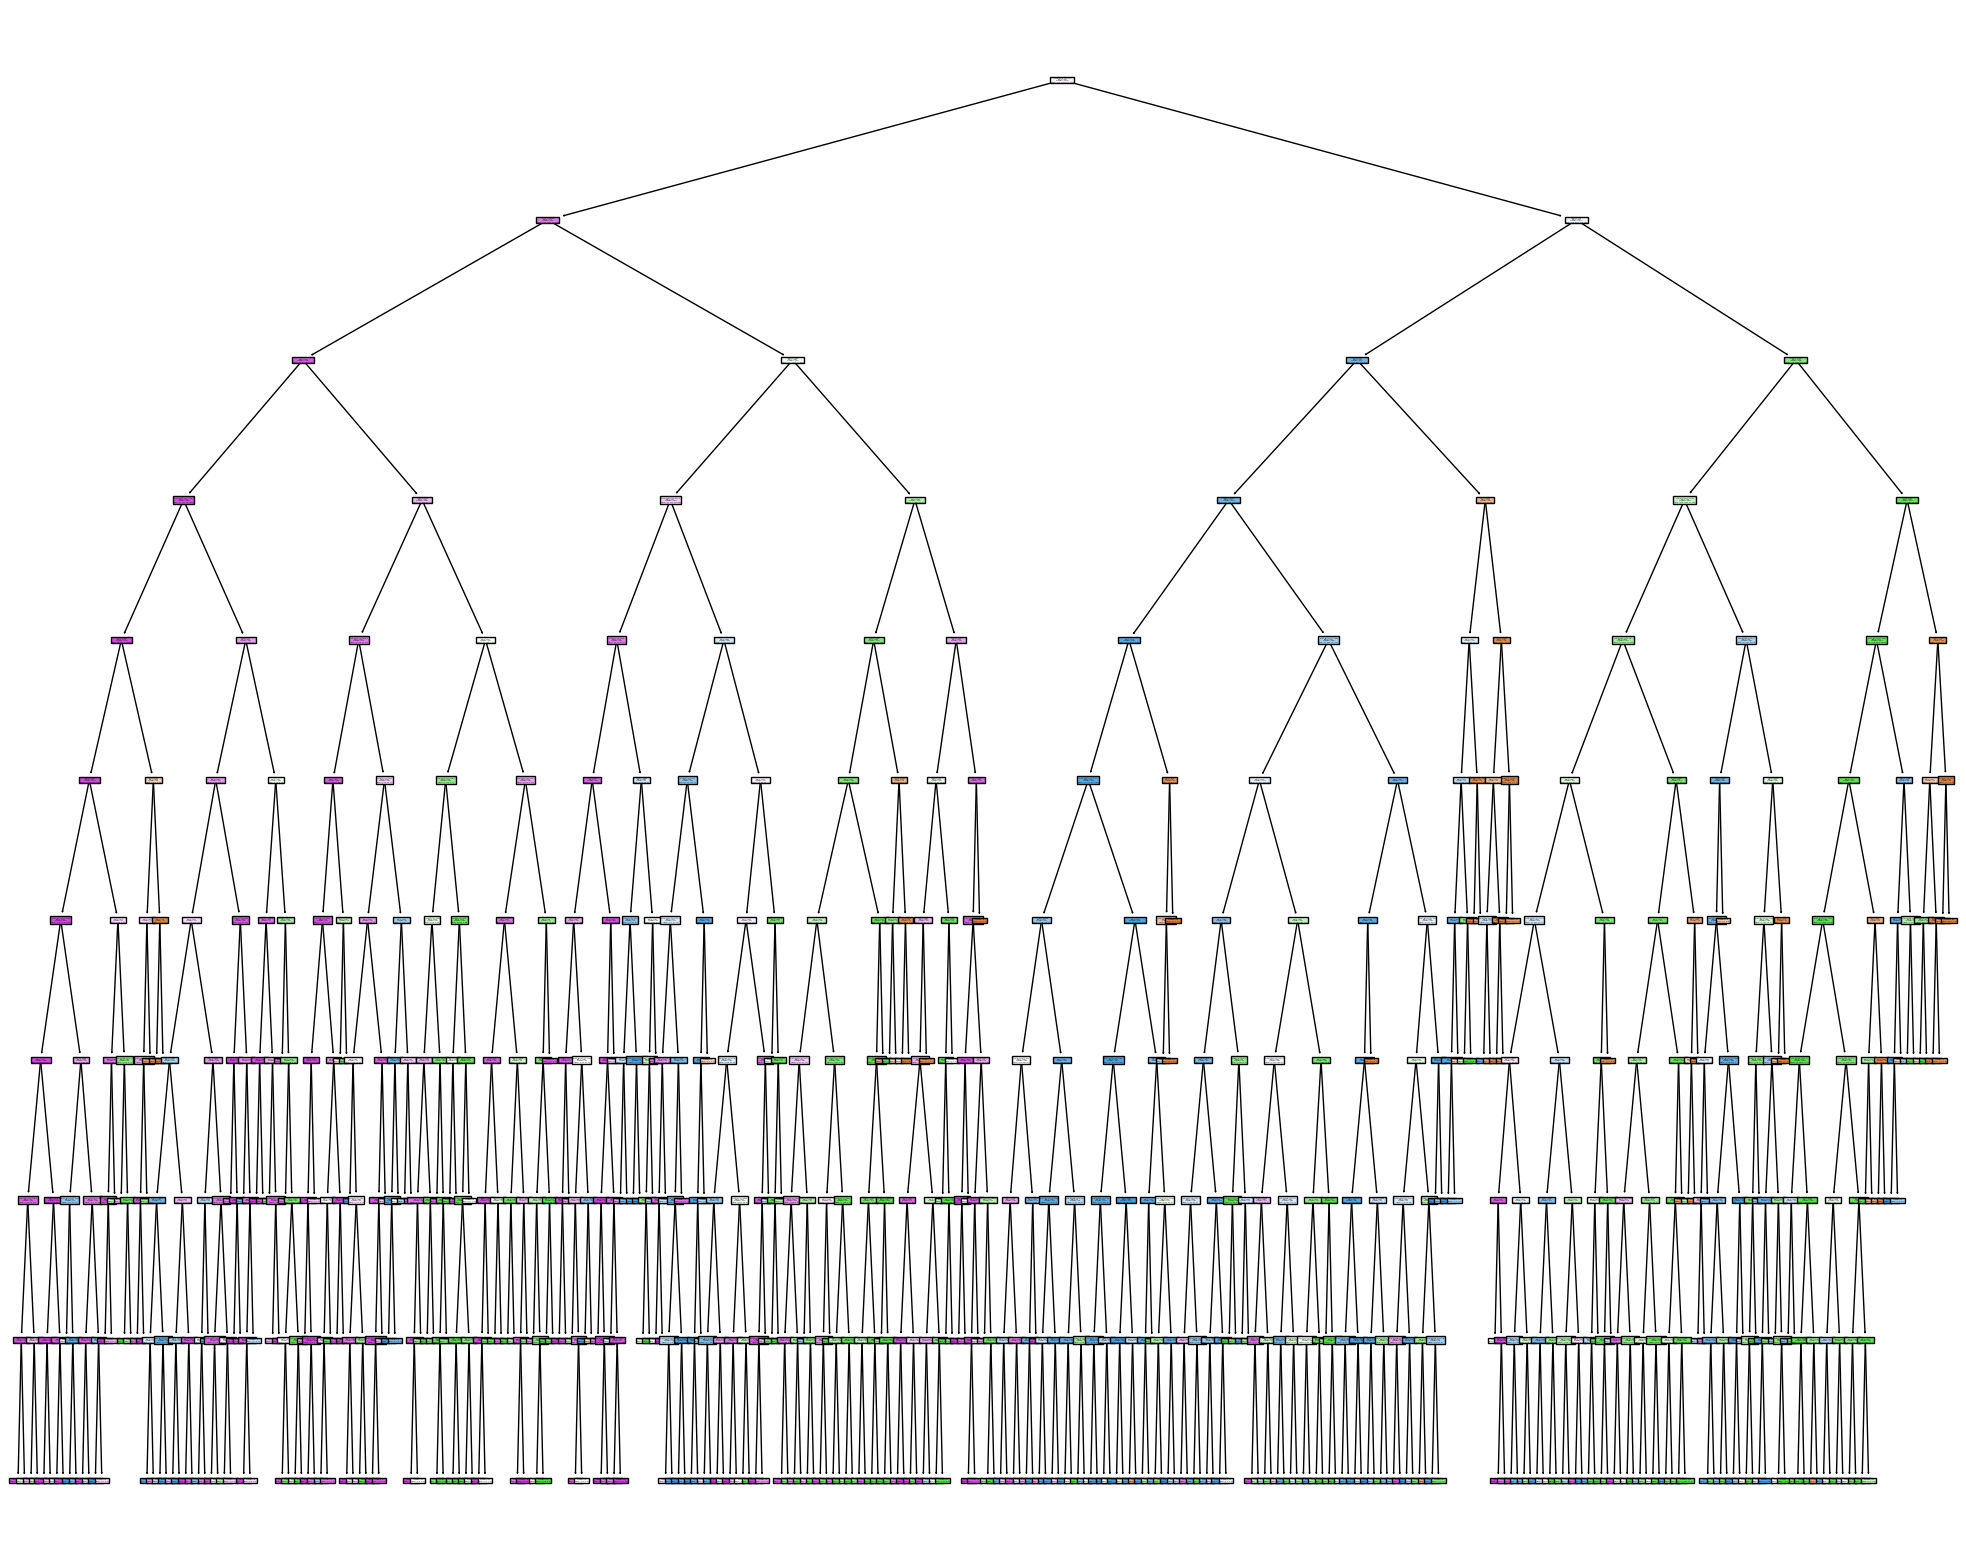

In [5]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Cluster_tree_model, feature_names=ukb_ml_train_x_bio_urine .columns, filled=True)
fig.savefig("Decision_tree_clustering.pdf")

In [6]:
explainer_cluster = shap.TreeExplainer(Cluster_tree_model)
shap_values_cluster = explainer_cluster.shap_values(ukb_ml_train_x_bio_urine)

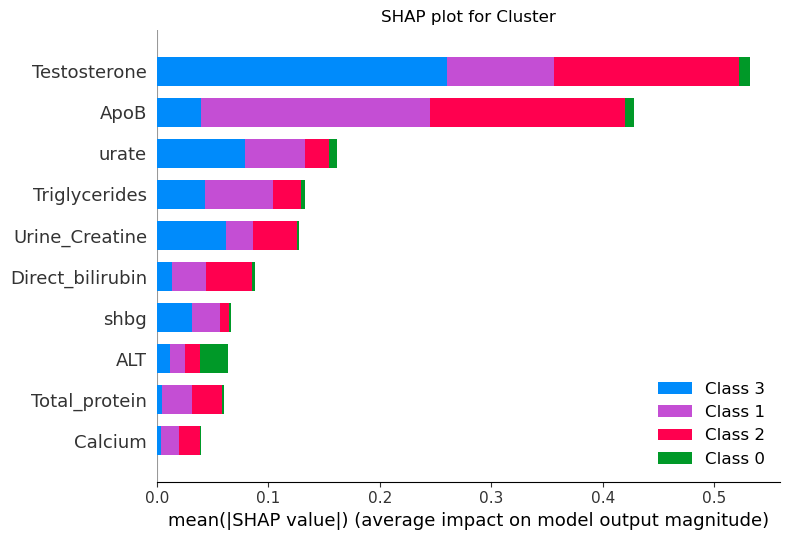

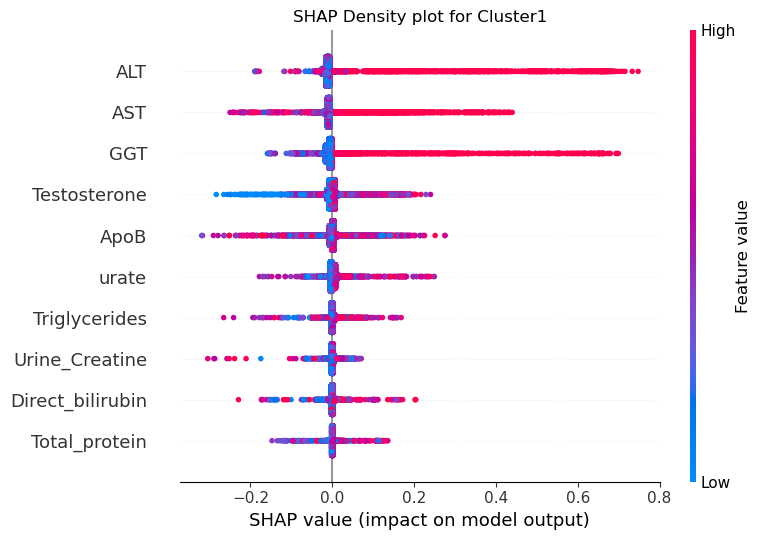

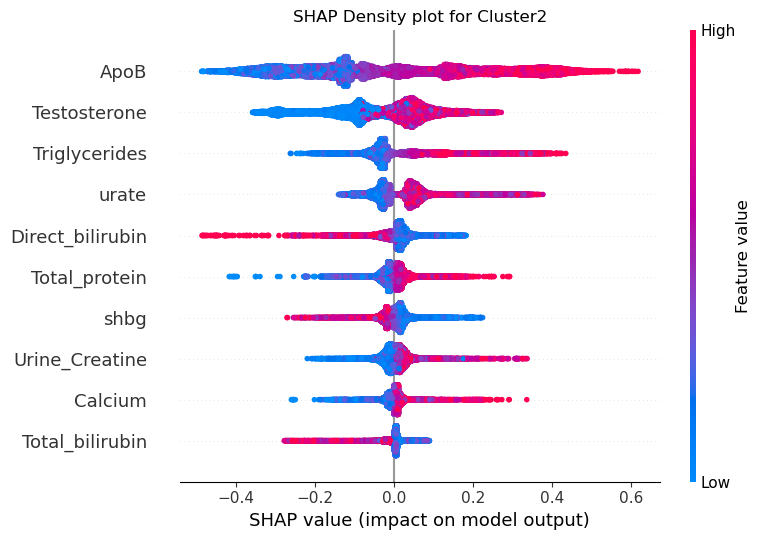

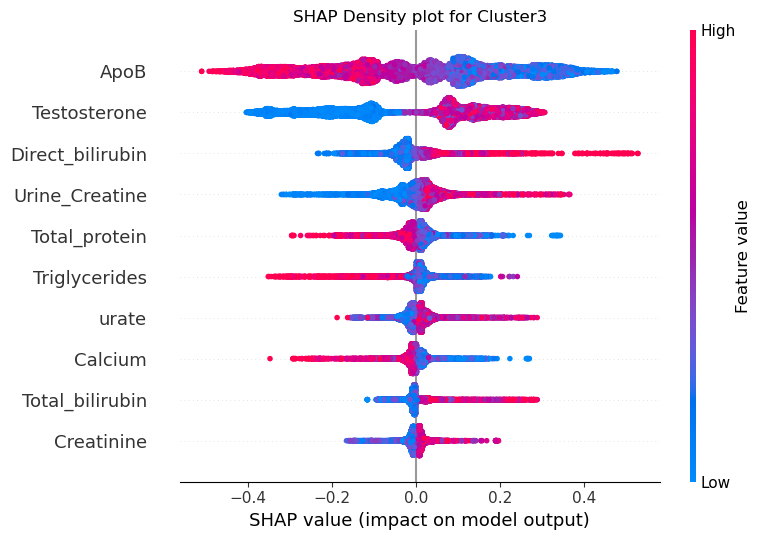

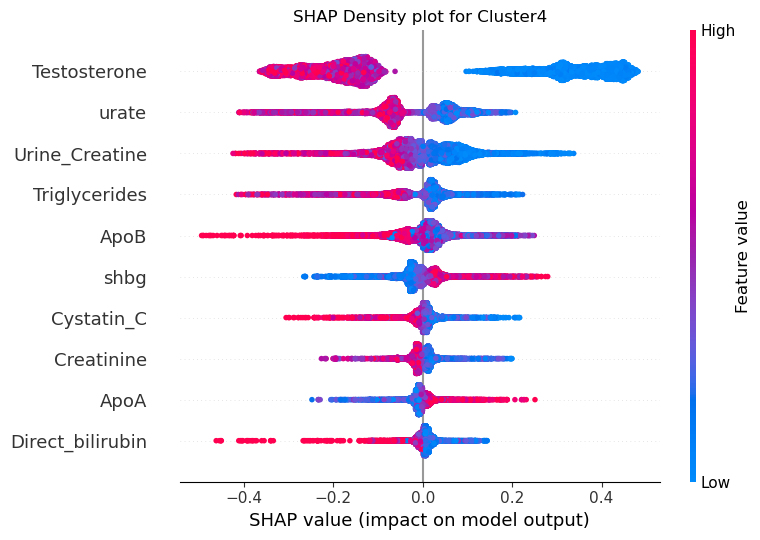

In [9]:
plt.title('SHAP plot for Cluster')
# shap.summary_plot(shap_values_cluster, features = ukb_ml_train_x_clst, class_inds = [1], max_display=10)
shap.summary_plot(shap_values_cluster, features = ukb_ml_train_x_bio_urine, max_display=10)
plt.show()

plt.title('SHAP Density plot for Cluster1')
shap.summary_plot(shap_values_cluster[0], ukb_ml_train_x_bio_urine, max_display=10)
plt.show()

plt.title('SHAP Density plot for Cluster2')
shap.summary_plot(shap_values_cluster[1], ukb_ml_train_x_bio_urine, max_display=10)
plt.show()

plt.title('SHAP Density plot for Cluster3')
shap.summary_plot(shap_values_cluster[2], ukb_ml_train_x_bio_urine, max_display=10)
plt.show()

plt.title('SHAP Density plot for Cluster4')
shap.summary_plot(shap_values_cluster[3], ukb_ml_train_x_bio_urine, max_display=10)
plt.show()